#### Title: Milestone 3
#### Author: Jerock Kalala
#### Date: April 29th 2023
#### Modified By: --
#### EDA (Exploratory Data Analysis)

In [181]:
# import libraries
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [182]:
data = pd.read_csv("E:\\Bellevue\\Spring_2023\\DSC410_Predictive Analytics\\Week_6\\startups_profit2.csv", thousands=' ')
print(data.shape)
data.head()

(50, 5)


,RDSpend,Administration,MarketingSpend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


# EDA and feature engineering

In [183]:
print(data.columns, "\n")
data.info()

Index(['RDSpend', 'Administration', 'MarketingSpend', 'State', 'Profit'], dtype='object') 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   RDSpend         50 non-null     float64
 1   Administration  50 non-null     float64
 2   MarketingSpend  50 non-null     float64
 3   State           50 non-null     object 
 4   Profit          50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [184]:
# check for missing values
print(data.isnull().sum())

RDSpend           0
Administration    0
MarketingSpend    0
State             0
Profit            0
dtype: int64


In [185]:
# drop missing values
data = data.dropna()

In [187]:
# explore dataset
data.describe()

,RDSpend,Administration,MarketingSpend,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


<AxesSubplot: xlabel='RDSpend', ylabel='Profit'>

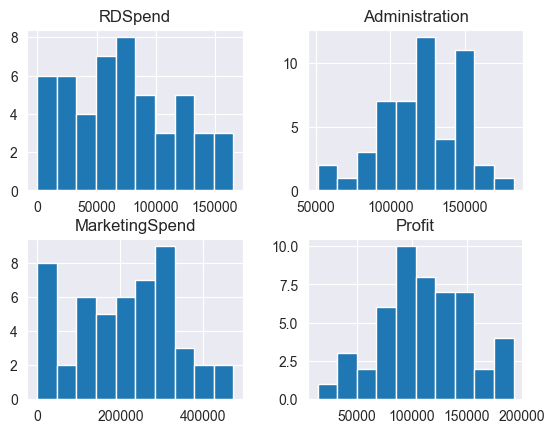

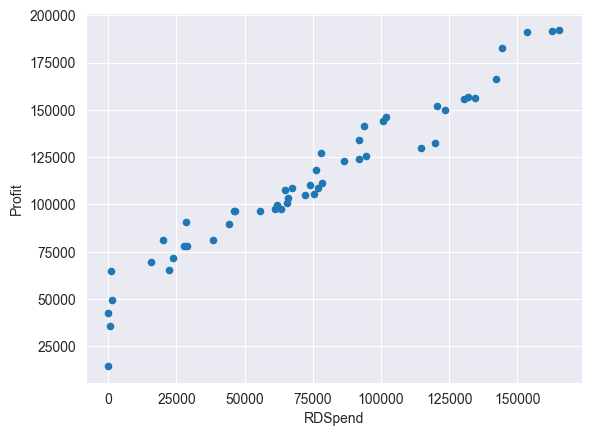

In [129]:
# visualize data
data.hist()
data.plot.scatter(x='RDSpend', y='Profit')

In [188]:
data.corr()

C:\Users\jeroc\AppData\Local\Temp\ipykernel_38592\1185648202.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.corr()


,RDSpend,Administration,MarketingSpend,Profit
RDSpend,1.000000,0.241955,0.724248,0.972900
Administration,0.241955,1.000000,-0.032154,0.200717
MarketingSpend,0.724248,-0.032154,1.000000,0.747766
Profit,0.972900,0.200717,0.747766,1.000000


C:\Users\jeroc\AppData\Local\Temp\ipykernel_38592\1614732859.py:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(), annot = True, vmin = -1, vmax = 1)


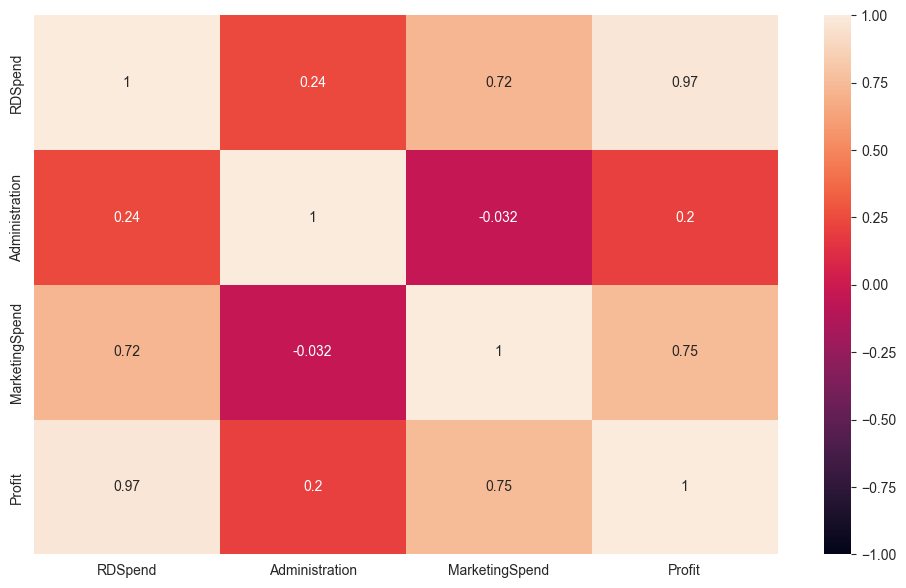

In [156]:
from matplotlib import pyplot as plt

plt.figure(figsize=(12, 7))
sns.heatmap(data.corr(), annot = True, vmin = -1, vmax = 1)
plt.show()

In [189]:
# encode categorical variables
data = pd.get_dummies(data, columns=['State'])

In [190]:
data.columns

Index(['RDSpend', 'Administration', 'MarketingSpend', 'Profit',
       'State_California', 'State_Florida', 'State_New York'],
      dtype='object')

In [191]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   RDSpend           50 non-null     float64
 1   Administration    50 non-null     float64
 2   MarketingSpend    50 non-null     float64
 3   Profit            50 non-null     float64
 4   State_California  50 non-null     uint8  
 5   State_Florida     50 non-null     uint8  
 6   State_New York    50 non-null     uint8  
dtypes: float64(4), uint8(3)
memory usage: 1.8 KB


In [192]:
# scale numerical variables
scaler = StandardScaler()
data[['RDSpend', 'Administration', 'MarketingSpend']] = scaler.fit_transform(data[['RDSpend', 'Administration', 'MarketingSpend']])

In [193]:
# create new features
data['Profit/RDSpend'] = data['Profit'] / data['RDSpend']
data['Marketing/R&DSpend'] = data['MarketingSpend'] / data['RDSpend']

In [194]:
print(data.columns, "\n")
data.head()

Index(['RDSpend', 'Administration', 'MarketingSpend', 'Profit',
       'State_California', 'State_Florida', 'State_New York', 'Profit/RDSpend',
       'Marketing/R&DSpend'],
      dtype='object') 



,RDSpend,Administration,MarketingSpend,Profit,State_California,State_Florida,State_New York,Profit/RDSpend,Marketing/R&DSpend
0,2.016411,0.560753,2.153943,192261.83,0,0,1,95348.509296,1.068206
1,1.955860,1.082807,1.923600,191792.06,1,0,0,98060.202166,0.983506
2,1.754364,-0.728257,1.626528,191050.39,0,1,0,108900.102108,0.927133
3,1.554784,-0.096365,1.422210,182901.99,0,0,1,117638.222675,0.914732
4,1.504937,-1.079919,1.281528,166187.94,0,1,0,110428.488041,0.851549


In [195]:
data.dtypes

RDSpend               float64
Administration        float64
MarketingSpend        float64
Profit                float64
State_California        uint8
State_Florida           uint8
State_New York          uint8
Profit/RDSpend        float64
Marketing/R&DSpend    float64
dtype: object

In [196]:
num = ['R&D Spend', 'Administration', 'Marketing Spend', 'Marketing/R&D Spend', 'Profit/RDSpend']

In [213]:
# split data into training and testing sets
X = data.drop('Profit', axis=1)
y = data['Profit']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [214]:
print("x_train shape: ", X_train.shape)
print("Y_train shape: ", y_train.shape)
print("x_test shape: ", X_test.shape)
print("Y_test shape: ", y_test.shape)

x_train shape:  (40, 8)
Y_train shape:  (40,)
x_test shape:  (10, 8)
Y_test shape:  (10,)


Medelisation and training using Linear Regression model

In [215]:
# create and train model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [216]:
#predicting
y_pred = model.predict(X_test)

In [204]:
from sklearn.metrics import r2_score

# evaluate model on testing set
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
print("MSE: ", mse)
print("MAE: ", mae)
print("RMSE: ", rmse)
print("R-squared: {:,.2f}".format(r2))


MSE:  104119520.79624765
MAE:  8428.984077642463
RMSE:  10203.897333678326
R-squared: 0.87


In [205]:
# hyperparameter tuning with cross-validation
parameters = {'fit_intercept':[True,False], 'normalize':[True,False], 'copy_X':[True, False]}
grid_search = GridSearchCV(estimator=model, param_grid=parameters, cv=5)
grid_search.fit(X_train, y_train)
print("Best parameters: ", grid_search.best_params_)
print("Best score: ", grid_search.best_score_)

Best parameters:  {'copy_X': True, 'fit_intercept': False, 'normalize': True}
Best score:  0.8831421257507295


C:\Users\jeroc\Python\Python310\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  warnings.warn(
C:\Users\jeroc\Python\Python310\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pip

In [206]:
# train model with best parameters
best_model = LinearRegression(fit_intercept=True, normalize=False, copy_X=True)
best_model.fit(X_train, y_train)

C:\Users\jeroc\Python\Python310\lib\site-packages\sklearn\linear_model\_base.py:148: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2. Please leave the normalize parameter to its default value to silence this warning. The default behavior of this estimator is to not do any normalization. If normalization is needed please use sklearn.preprocessing.StandardScaler instead.
  warnings.warn(


LinearRegression(normalize=False)

In [207]:
y_pred1 = best_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred1)
mae = mean_absolute_error(y_test, y_pred1)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred1)
print("MSE: ", mse)
print("MAE: ", mae)
print("RMSE: ", rmse)
print("R-squared: {:,.2f}".format(r2))

MSE:  104119520.79624765
MAE:  8428.984077642463
RMSE:  10203.897333678326
R-squared: 0.87


In [219]:
#Optimizing a single hyper-parameter
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1, random_state=13)

In [220]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error

candidates = np.arange(4,16)
mae_metrics = []
for k in candidates:
    model = KNeighborsRegressor(n_neighbors=k, weights='distance', metric='minkowski', leaf_size=50, n_jobs=4)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_val)
    metric = mean_absolute_error(y_true=y_val, y_pred=y_pred)
    mae_metrics.append(metric)

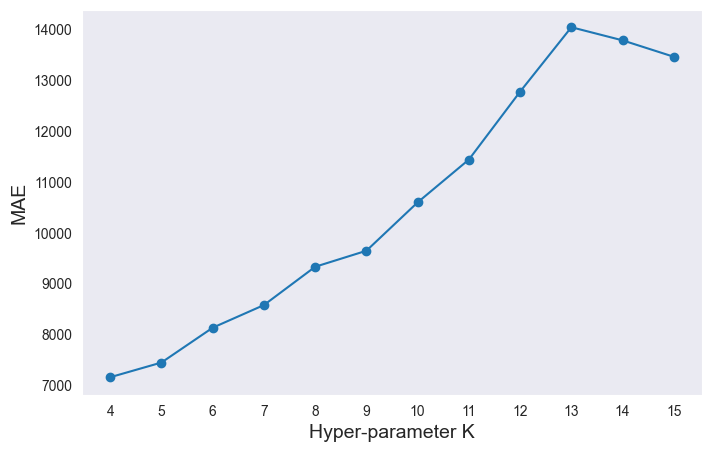

In [221]:
fig, ax = plt.subplots(figsize=(8,5))
ax.plot(candidates, mae_metrics, "o-")
ax.set_xlabel('Hyper-parameter K', fontsize=14)
ax.set_ylabel('MAE', fontsize=14)
ax.set_xticks(candidates)
ax.grid();

In [222]:
#Recalculating train-set split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=7)
scaler = StandardScaler()
scaler.fit(X_train)
X_train= scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [223]:
#Optimizing with cross-validation
from sklearn.model_selection import cross_val_score
candidates = np.arange(4,16)
mean_mae = []
std_mae = []
for k in candidates:
    model = KNeighborsRegressor(n_neighbors=k, weights='distance', metric='minkowski', leaf_size=50, n_jobs=4)
    cv_results = cross_val_score(model, X_train, y_train, scoring='neg_mean_absolute_error', cv=10)
    mean_score, std_score = -1*cv_results.mean(), cv_results.std()
    mean_mae.append(mean_score)
    std_mae.append(std_score)

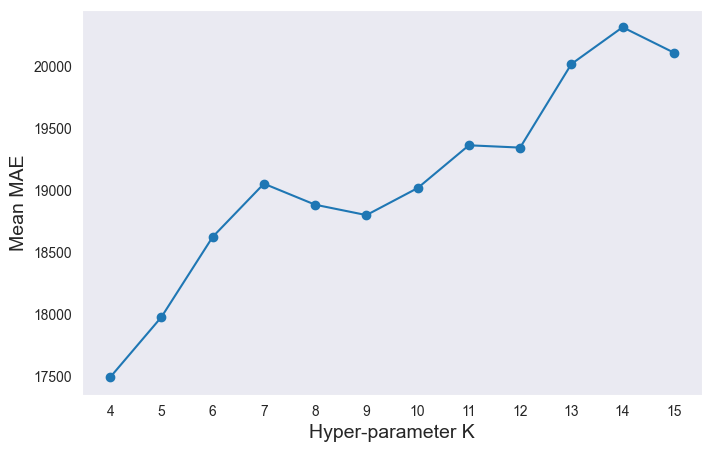

In [224]:
#vizualizing
fig, ax = plt.subplots(figsize=(8,5))
ax.plot(candidates, mean_mae, "o-")
ax.set_xlabel('Hyper-parameter K', fontsize=14)
ax.set_ylabel('Mean MAE', fontsize=14)
ax.set_xticks(candidates)
ax.grid();

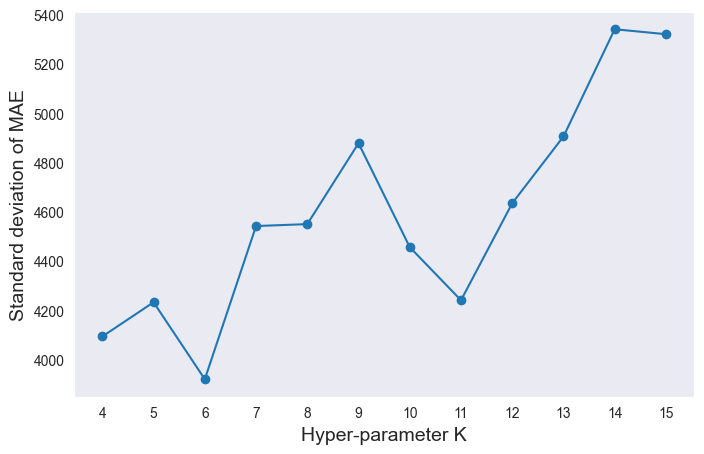

In [225]:
#Vizualizing
fig, ax = plt.subplots(figsize=(8,5))
ax.plot(candidates, std_mae, "o-")
ax.set_xlabel('Hyper-parameter K', fontsize=14)
ax.set_ylabel('Standard deviation of MAE', fontsize=14)
ax.set_xticks(candidates)
ax.grid();